In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = acquire.get_zillow_data()
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
acquire.summarize(df)

----------------------------------------------------
DataFrame Head
   parcelid  typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0  14297519                     NaN          NaN                  261.0   
1  17052889                     NaN          NaN                  261.0   
2  14186244                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid       id  basementsqft  ...  censustractandblock  \
0                    NaN  1727539           NaN  ...         6.059063e+13   
1                    NaN  1387261           NaN  ...         6.111001e+13   
2                    NaN    11677           NaN  ...         6.059022e+13   

   logerror  transact

### Takeaways

## Prepare

In [4]:
df.shape

(77574, 68)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77574 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77574 non-null  float64
 4   heatingorsystemtypeid         49569 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         25006 non-null  float64
 8   id                            77574 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77574 non-null  float64
 11  bedroomcnt                    77574 non-null  float64
 12  buildingqualitytypeid         49808 non-null  float64
 13  c

In [6]:
# set index to parcelid
df.set_index('parcelid', drop=True, inplace=True)
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [7]:
# filter by propertylandusetypeid
df = df[df.propertylandusetypeid == 261]
df.shape

(52438, 67)

In [8]:
prepare.miss_dup_values(df)

Your selected dataframe has 67 columns.
There are 52 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
finishedsquarefeet13,52438,100.0
buildingclasstypeid,52438,100.0
buildingclassdesc,52438,100.0
finishedsquarefeet15,52438,100.0
storydesc,52391,99.9
basementsqft,52391,99.9
storytypeid,52391,99.9
yardbuildingsqft26,52375,99.9
architecturalstyletypeid,52368,99.9
architecturalstyledesc,52368,99.9


In [9]:
df.shape

(52438, 67)

In [10]:
# drop columns and rows with missing values
df = prepare.handle_missing_values(df)
df.shape

(52359, 33)

In [11]:
# create feature for analysis
df = prepare.create_features(df)
df.head().T

parcelid,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261,261,261,261,261
heatingorsystemtypeid,NaN,NaN,NaN,2,2
id,1727539,1387261,11677,2288172,781532
bathroomcnt,3.5,1,2,3,3
bedroomcnt,4,2,3,4,4
buildingqualitytypeid,NaN,NaN,NaN,8,9
calculatedbathnbr,3.5,1,2,3,3
calculatedfinishedsquarefeet,3100,1465,1243,2376,2962
finishedsquarefeet12,3100,1465,1243,2376,2962
fips,6059,6111,6059,6037,6037


In [12]:
# drop columns with redundant information and unneeded columns
df = df.drop(columns=['propertylandusetypeid', 'heatingorsystemtypeid', 'id', 'buildingqualitytypeid', \
                          'calculatedbathnbr',  'finishedsquarefeet12', 'fullbathcnt', 'lotsizesquarefeet', \
                          'regionidcounty', 'propertycountylandusecode', 'propertyzoningdesc', 'censustractandblock', \
                         'rawcensustractandblock', 'roomcnt', 'unitcnt', 'assessmentyear', 'propertylandusedesc', \
                         'transactiondate', 'heatingorsystemdesc', 'regionidcity', 'regionidzip', 'yearbuilt'])

In [13]:
list(df)

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age',
 'taxrate',
 'acres',
 'bath_bed_ratio']

In [14]:
df = df.rename(columns={'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms', 'calculatedfinishedsquarefeet': 'square_feet', \
                        'structuretaxvaluedollarcnt': 'building_value', 'taxvaluedollarcnt': 'appraised_value', \
                        'fips': 'county_code', 'landtaxvaluedollarcnt': 'land_value', 'taxamount': 'taxes'})

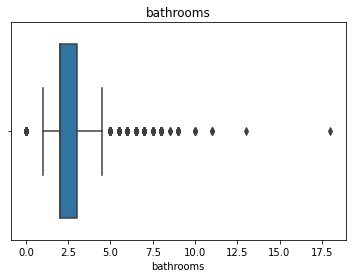

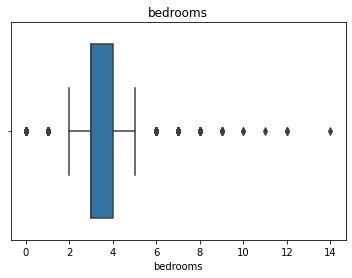

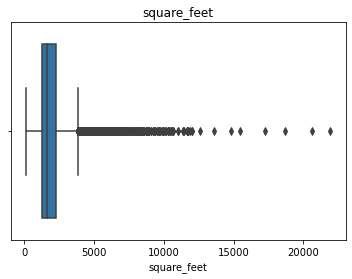

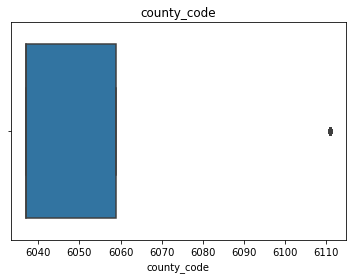

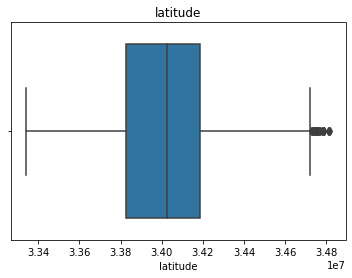

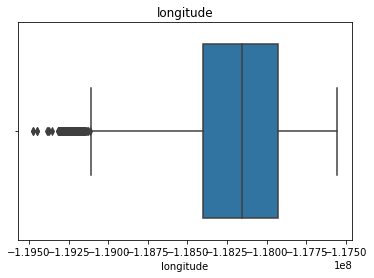

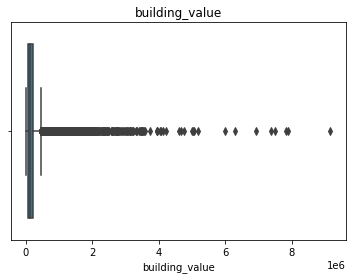

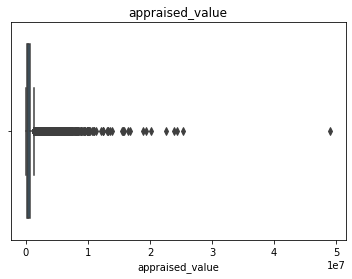

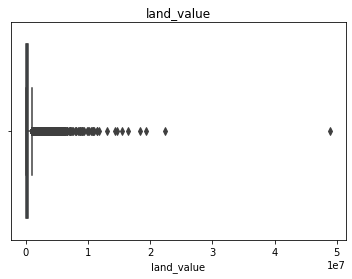

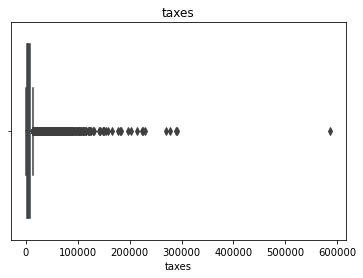

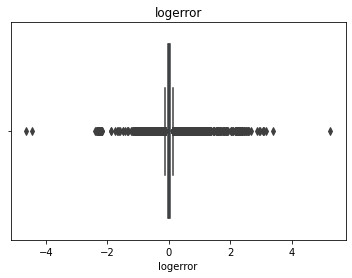

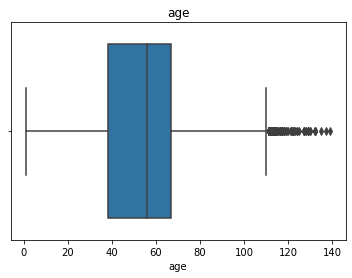

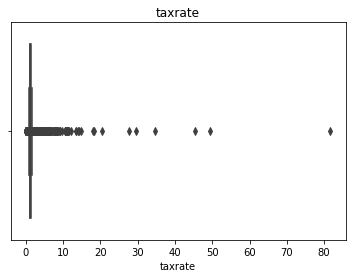

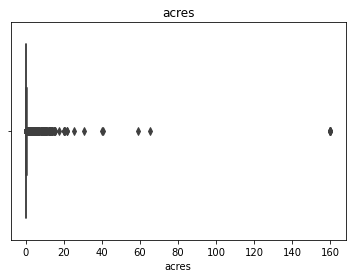

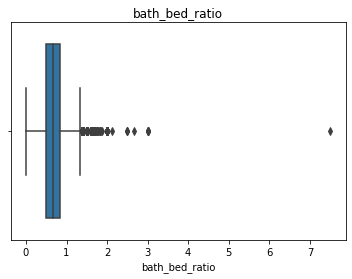

In [15]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [16]:
df.columns

Index(['bathrooms', 'bedrooms', 'square_feet', 'county_code', 'latitude',
       'longitude', 'building_value', 'appraised_value', 'land_value', 'taxes',
       'logerror', 'age', 'taxrate', 'acres', 'bath_bed_ratio'],
      dtype='object')

In [17]:
# remove outliers
df = df[((df.bathrooms > 0) & (df.bathrooms <= 7) & (df.bedrooms > 0) & (df.bedrooms <= 7) & 
               (df.square_feet < 10000) & (df.acres < 20) & (df.taxrate < 10))]

In [18]:
df.shape

(51749, 15)

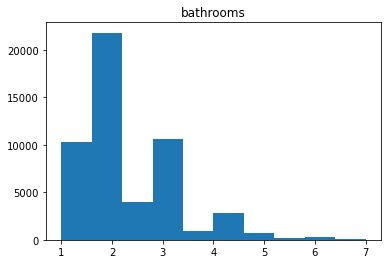

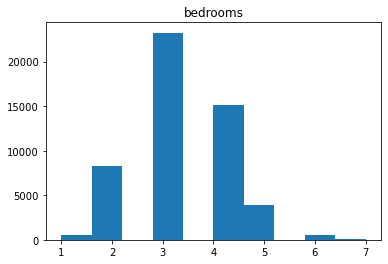

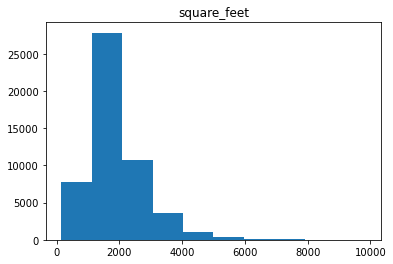

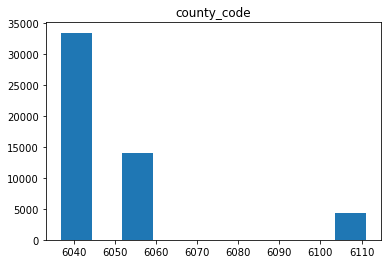

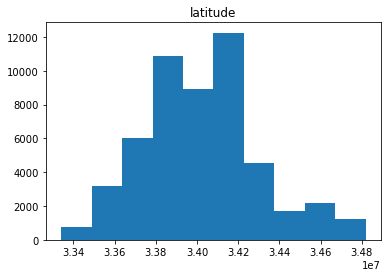

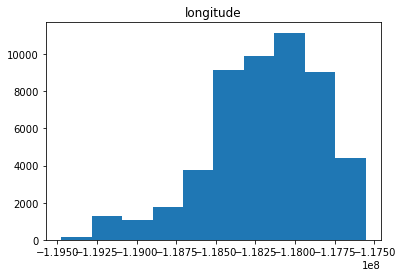

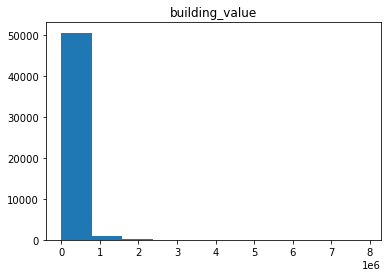

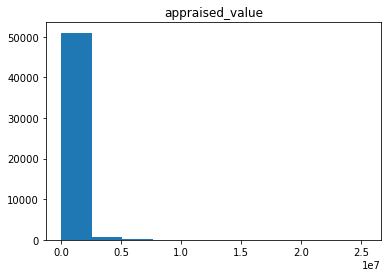

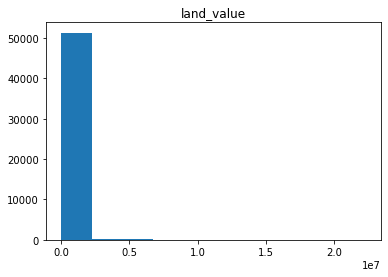

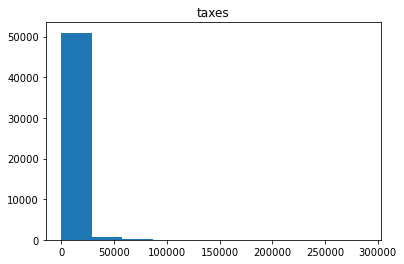

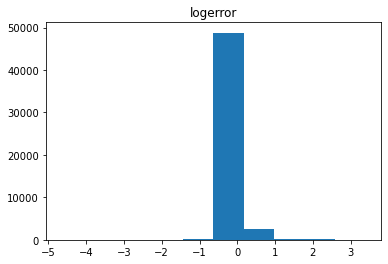

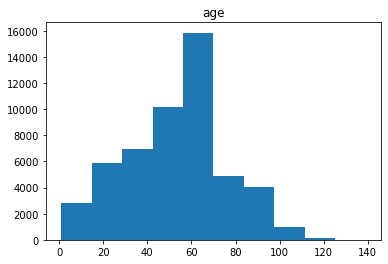

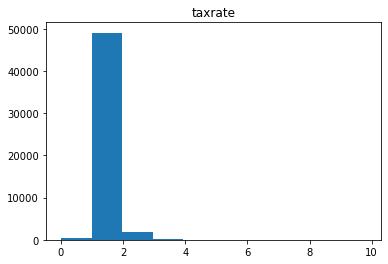

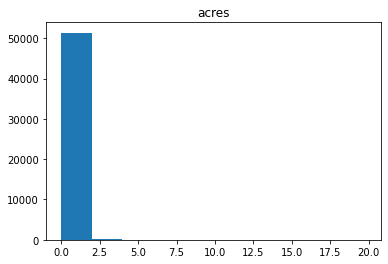

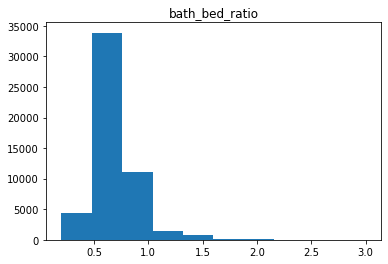

In [19]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [20]:
prepare.miss_dup_values(df)

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
building_value,58,0.1
age,28,0.1


In [21]:
# drop any left over nulls
df = df.dropna()

In [22]:
prepare.miss_dup_values(df)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [23]:
df.shape

(51663, 15)

In [24]:
# split the data
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_zillow(df, 'logerror')

In [25]:
train.shape, X_train.shape

((28931, 15), (28931, 14))

## Explore

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28931 entries, 11097148 to 12231217
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28931 non-null  float64
 1   bedrooms         28931 non-null  float64
 2   square_feet      28931 non-null  float64
 3   county_code      28931 non-null  float64
 4   latitude         28931 non-null  float64
 5   longitude        28931 non-null  float64
 6   building_value   28931 non-null  float64
 7   appraised_value  28931 non-null  float64
 8   land_value       28931 non-null  float64
 9   taxes            28931 non-null  float64
 10  logerror         28931 non-null  float64
 11  age              28931 non-null  float64
 12  taxrate          28931 non-null  float64
 13  acres            28931 non-null  float64
 14  bath_bed_ratio   28931 non-null  float64
dtypes: float64(15)
memory usage: 3.5 MB


In [27]:
# use RFE to find best features for analysis

X = train[list(train.select_dtypes(exclude=['uint8', 'category']).columns)].drop(columns=['logerror'])
y = train['logerror']

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=1)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['taxrate'], dtype='object')

In [28]:
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

taxrate             1
bath_bed_ratio      2
bathrooms           3
acres               4
bedrooms            5
age                 6
county_code         7
square_feet         8
taxes               9
appraised_value    10
latitude           11
building_value     12
land_value         13
longitude          14
dtype: int64

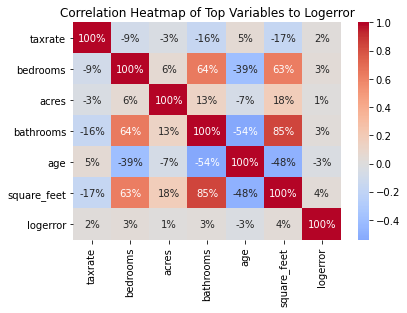

In [29]:
# examine top 6 property features
top_vars = train[['taxrate', 'bedrooms', 'acres',  'bathrooms', 'age', 'square_feet', 'logerror']]
sns.heatmap(top_vars.corr(), cmap='coolwarm', center=0, annot=True, fmt='.0%')
plt.title('Correlation Heatmap of Top Variables to Logerror')
plt.show()

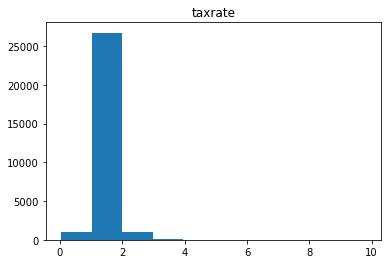

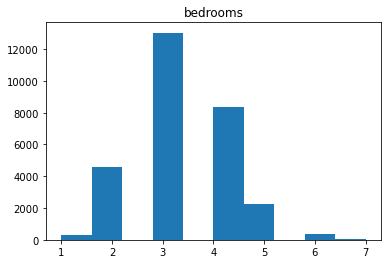

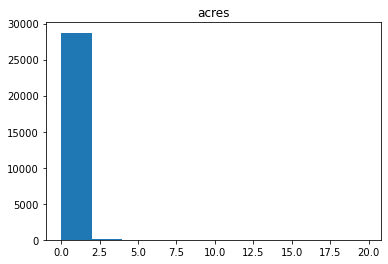

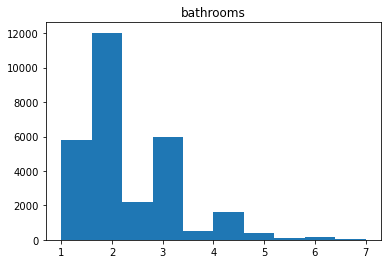

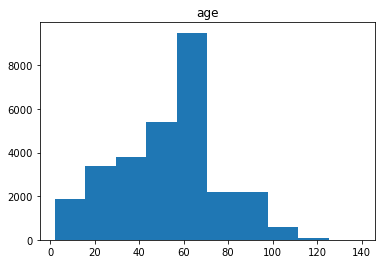

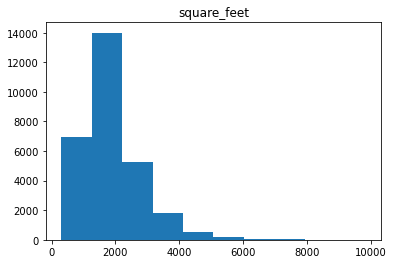

In [30]:
explore = train[['taxrate', 'bedrooms', 'acres', 'bathrooms', 'age', 'square_feet']]

for col in explore.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

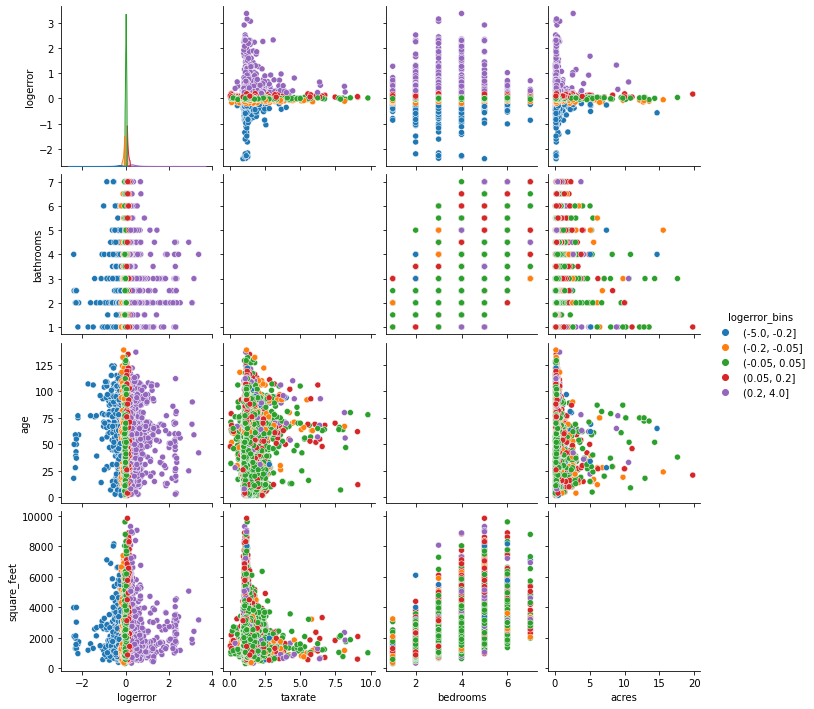

In [31]:
# quick look at the interaction of the top variables
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'taxrate', 'bedrooms', 'acres'],
             y_vars = ['logerror', 'bathrooms', 'age', 'square_feet'])
plt.show()

Takeaways:

#### Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing

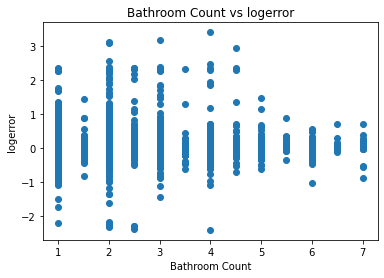

In [32]:
# Question: Does logerror vary across bathrooms?

plt.scatter(train.bathrooms, train.logerror)
plt.xlabel('Bathroom Count')
plt.ylabel('logerror')
plt.title('Bathroom Count vs logerror')
plt.show()

In [33]:
# bin bathrooms into 2 groups
train['bathroom_bin'] = pd.cut(train.bathrooms,[1,4,7])

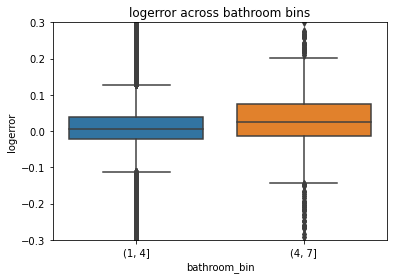

In [34]:
sns.boxplot(train.bathroom_bin, train.logerror)
plt.title('logerror across bathroom bins')
plt.ylim(-0.3, 0.3)
plt.show()

In [35]:
# test for equal variance across logerror between 4 and under bathrooms group and over 4 bathrooms group
null_hypothesis = 'the variance across logerror between groups is equal.'
alt_hypothesis = 'the variance across logerror between groups is not equal.'

alpha = 0.05

stat, p = stats.levene(train[train.bathrooms <= 4].logerror, train[train.bathrooms > 4].logerror)

if p < alpha:
    print('Can reject the null hypothesis that', null_hypothesis)
    print('There is evidence to support that', alt_hypothesis)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', null_hypothesis)

Can reject the null hypothesis that the variance across logerror between groups is equal.
There is evidence to support that the variance across logerror between groups is not equal.


In [36]:
# test for significant difference in means between 4 and under bathrooms group and over 4 bathrooms group
null_hypothesis = 'there is no significant difference in means between groups.'
alt_hypothesis = 'there is a significant difference in means between groups.'

alpha = 0.05

t, p = stats.ttest_ind(train[train.bathrooms <= 4].logerror, train[train.bathrooms > 4].logerror, equal_var=False)

if p < alpha:
    print('Can reject the null hypothesis that', null_hypothesis)
    print('There is evidence to support that', alt_hypothesis)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', null_hypothesis)

Can reject the null hypothesis that there is no significant difference in means between groups.
There is evidence to support that there is a significant difference in means between groups.


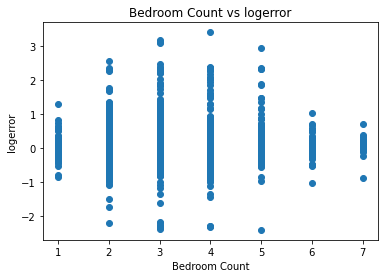

In [37]:
# Question: Is there a relationship between logerror and bedrooms?

plt.scatter(train.bedrooms, train.logerror)
plt.xlabel('Bedroom Count')
plt.ylabel('logerror')
plt.title('Bedroom Count vs logerror')
plt.show()

In [38]:
# bin # of bedrooms
train['bedroom_bin'] = pd.cut(train.bedrooms,[1,4,7])

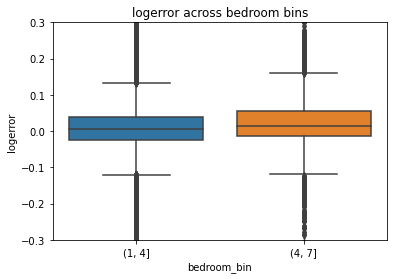

In [39]:
sns.boxplot(train.bedroom_bin, train.logerror)
plt.title('logerror across bedroom bins')
plt.ylim(-0.3, 0.3)
plt.show()

In [40]:
# levene H0 : equal variance across logerror between 4 and under bedrooms group and over 4 bedrooms group
# alpha = 0.05

stats.levene(train[train.bedrooms <= 4].logerror, train[train.bedrooms > 4].logerror)

LeveneResult(statistic=1.918233061499771, pvalue=0.16606225755247614)

cannot reject the null, there is evidence to support that the variance is equal

In [41]:
# null hypothesis: there is no significant difference in means between 4 and under bedrooms group and over 4 bedrooms group
# alpha = 0.05

stats.ttest_ind(train[train.bedrooms <= 4].logerror, train[train.bedrooms > 4].logerror, equal_var=True)

Ttest_indResult(statistic=-4.891773927859521, pvalue=1.004675279420499e-06)

can reject the null, there is evidence to support that there is a significant difference in means

In [42]:
# Question: If we control for acres, does logerror differ across taxes?

train.acres.mean()

0.22757313330197057

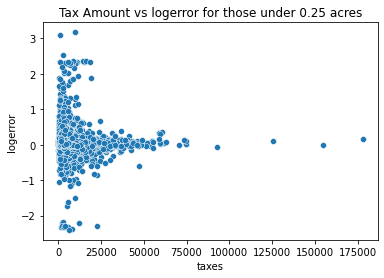

In [43]:
# decided to round acres to 0.25 (1/4 acre lot) for this comparison
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres <= 0.25])
plt.title('Tax Amount vs logerror for those under 0.25 acres')
plt.show()

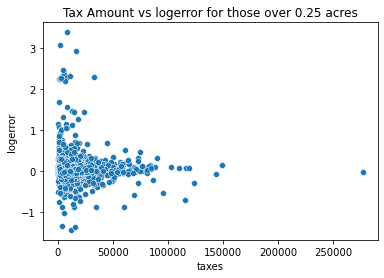

In [44]:
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres > 0.25])
plt.title('Tax Amount vs logerror for those over 0.25 acres')
plt.show()

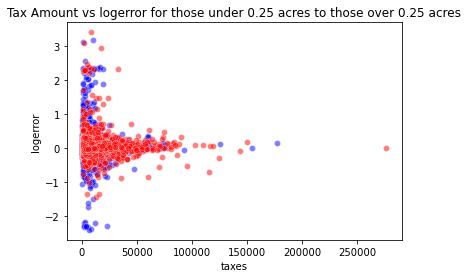

In [45]:
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres <= 0.25], color='blue', alpha=0.5)
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres > 0.25], color='red', alpha=0.5)
plt.title('Tax Amount vs logerror for those under 0.25 acres to those over 0.25 acres')
plt.show()

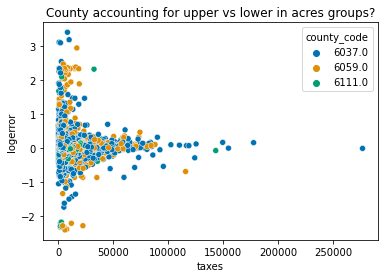

In [46]:
# is this being affected by county?

sns.scatterplot(x='taxes', y='logerror', data=train, hue='county_code', palette='colorblind')
plt.title('County accounting for upper vs lower in acres groups?')
plt.show()

#### Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [47]:
# top variables by RFE
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

taxrate             1
bath_bed_ratio      2
bathrooms           3
acres               4
bedrooms            5
age                 6
county_code         7
square_feet         8
taxes               9
appraised_value    10
latitude           11
building_value     12
land_value         13
longitude          14
dtype: int64

#### Making Clusters

In [48]:
# make an 'overall_size' cluster
X1_train = train[['square_feet', 'acres']]
X1_train.head()

,square_feet,acres
parcelid,,
11097148,1479.0,0.180005
13904783,1432.0,0.156841
11558242,2844.0,0.133287
11884010,3537.0,0.294605
17258285,496.0,0.137695


In [49]:
# Scale the X's
scaler = MinMaxScaler().fit(X1_train)
X1_train_scaled = pd.DataFrame(scaler.transform(X1_train), columns= X1_train.columns).set_index([X1_train.index.values])
X1_train_scaled.head()

,square_feet,acres
11097148,0.123481,0.008472
13904783,0.118559,0.007301
11558242,0.266443,0.006111
11884010,0.339024,0.014265
17258285,0.020528,0.006333


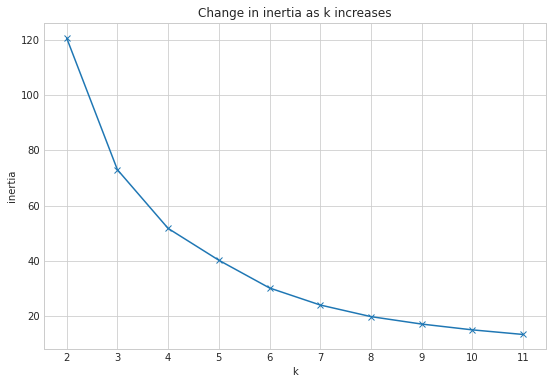

In [50]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [51]:
# chose to examine 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X1_train_scaled)

# Make a dataframe of centroids
centroids1 = pd.DataFrame(kmeans.cluster_centers_, columns = X1_train_scaled.columns)

# Use (predict using) the thing 
X1_train_scaled['cluster'] = kmeans.predict(X1_train_scaled)
train['size_clusters'] = X1_train_scaled['cluster']
# X1_scaled['cluster'] = 'cluster_' + X1_scaled.cluster.astype(str)
X1_train_scaled.head()

,square_feet,acres,cluster
11097148,0.123481,0.008472,1
13904783,0.118559,0.007301,1
11558242,0.266443,0.006111,0
11884010,0.339024,0.014265,2
17258285,0.020528,0.006333,1


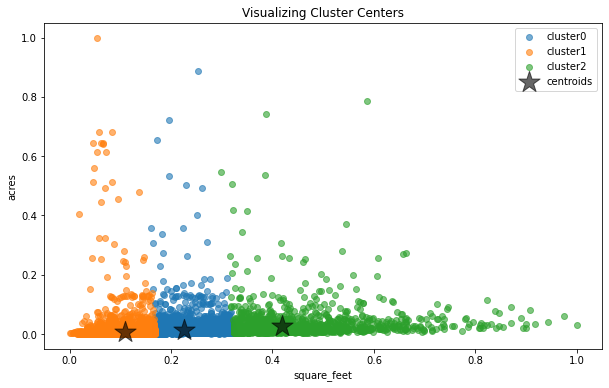

In [52]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data for clusters
for cluster, subset in X1_train_scaled.groupby('cluster'):
    plt.scatter(subset.square_feet, subset.acres, label='cluster' + str(cluster), alpha=.6)

# plot cluster centers (centroids)
centroids1.plot.scatter(x='square_feet', y='acres', ax=plt.gca(), s=500, color='k', alpha=0.6, marker='*', label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [53]:
# make a cluster of bath_bed_ratio and appraised_value ('bbratio_value')
X2_train = train[['bath_bed_ratio', 'appraised_value']]
X2_validate = validate[['bath_bed_ratio', 'appraised_value']]
X2_test = test[['bath_bed_ratio', 'appraised_value']]
X2_train.head()

,bath_bed_ratio,appraised_value
parcelid,,
11097148,0.500000,129739.0
13904783,0.666667,521000.0
11558242,1.250000,1820000.0
11884010,0.750000,1171478.0
17258285,1.000000,199654.0


In [54]:
# Scale the X's
scaler = MinMaxScaler().fit(X2_train)
X2_train_scaled = pd.DataFrame(scaler.transform(X2_train), columns= X2_train.columns).set_index([X2_train.index.values])
X2_validate_scaled = pd.DataFrame(scaler.transform(X2_validate), columns= X2_validate.columns).set_index([X2_validate.index.values])
X2_test_scaled = pd.DataFrame(scaler.transform(X2_test), columns= X2_test.columns).set_index([X2_test.index.values])
X2_train_scaled.head()

,bath_bed_ratio,appraised_value
11097148,0.107143,0.005302
13904783,0.166667,0.021704
11558242,0.375000,0.076157
11884010,0.196429,0.048972
17258285,0.285714,0.008233


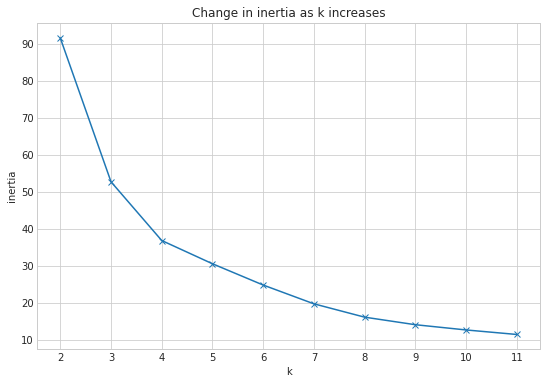

In [55]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [56]:
# chose 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X2_train_scaled)

# Make a dataframe of centroids
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns = X2_train_scaled.columns)

# Use (predict using) the thing 
X2_train_scaled['cluster'] = kmeans.predict(X2_train_scaled)
train['bbratio_value_cluster'] = X2_train_scaled['cluster']
# X2_scaled['cluster'] = 'cluster_' + X2_scaled.cluster.astype(str)
X2_train_scaled.head()

,bath_bed_ratio,appraised_value,cluster
11097148,0.107143,0.005302,2
13904783,0.166667,0.021704,0
11558242,0.375000,0.076157,1
11884010,0.196429,0.048972,0
17258285,0.285714,0.008233,1


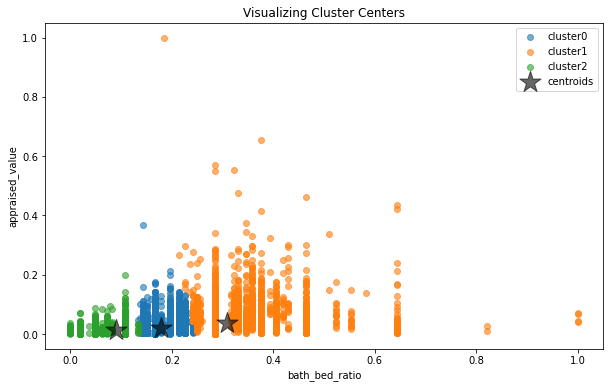

In [57]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data for clusters
for cluster, subset in X2_train_scaled.groupby('cluster'):
    plt.scatter(subset.bath_bed_ratio, subset.appraised_value, label='cluster' + str(cluster), alpha=.6)

# plot cluster centers (centroids)
centroids2.plot.scatter(x='bath_bed_ratio', y='appraised_value', ax=plt.gca(), s=500, color='k', alpha=0.6, marker='*', label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [58]:
# make a 'taxrate_age' cluster
X3_train = train[['taxrate', 'age']]
X3_validate = validate[['taxrate', 'age']]
X3_test = test[['taxrate', 'age']]
X3_train.head()

,taxrate,age
parcelid,,
11097148,1.307379,61.0
13904783,1.153144,62.0
11558242,1.198302,2.0
11884010,1.183360,105.0
17258285,1.259449,82.0


In [59]:
# Scale the X's
scaler = MinMaxScaler().fit(X3_train)
X3_train_scaled = pd.DataFrame(scaler.transform(X3_train), columns= X3_train.columns).set_index([X3_train.index.values])
X3_validate_scaled = pd.DataFrame(scaler.transform(X3_validate), columns= X3_validate.columns).set_index([X3_validate.index.values])
X3_test_scaled = pd.DataFrame(scaler.transform(X3_test), columns= X3_test.columns).set_index([X3_test.index.values])
X3_train_scaled.head()

,taxrate,age
11097148,0.129330,0.430657
13904783,0.113528,0.437956
11558242,0.118154,0.000000
11884010,0.116623,0.751825
17258285,0.124419,0.583942


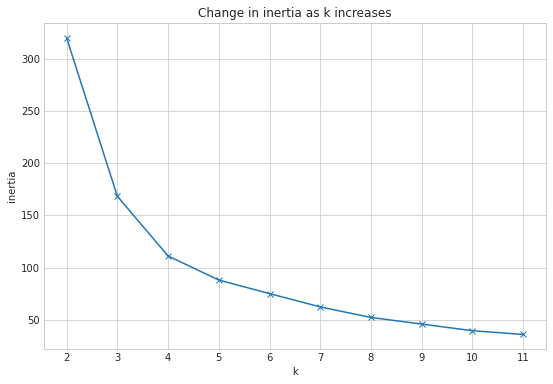

In [60]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [61]:
# chose 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X3_train_scaled)

# Make a dataframe of centroids
centroids3 = pd.DataFrame(kmeans.cluster_centers_, columns = X3_train_scaled.columns)

# Use (predict using) the thing 
X3_train_scaled['cluster'] = kmeans.predict(X3_train_scaled)
train['taxrate_age_cluster'] = X3_train_scaled['cluster']
# X3_scaled['cluster'] = 'cluster_' + X3_scaled.cluster.astype(str)
X3_train_scaled.head()

,taxrate,age,cluster
11097148,0.129330,0.430657,2
13904783,0.113528,0.437956,2
11558242,0.118154,0.000000,0
11884010,0.116623,0.751825,1
17258285,0.124419,0.583942,1


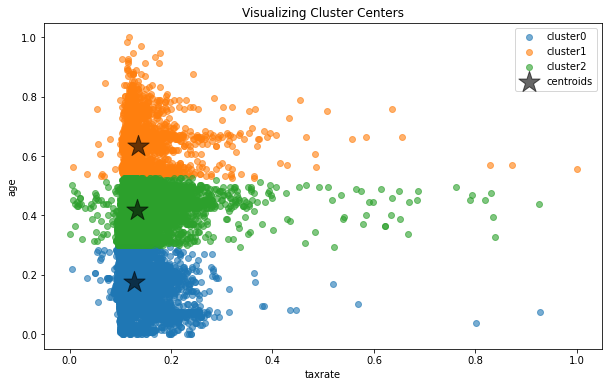

In [62]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data for clusters
for cluster, subset in X3_train_scaled.groupby('cluster'):
    plt.scatter(subset.taxrate, subset.age, label='cluster' + str(cluster), alpha=.6)


# plot cluster centers (centroids)
centroids3.plot.scatter(x='taxrate', y='age', ax=plt.gca(), s=500, color='k', alpha=0.6, marker='*', label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

#### Visualizations and Statistical Testing

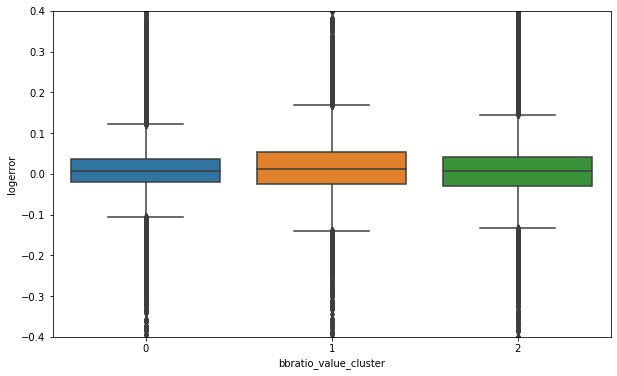

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='logerror', x='bbratio_value_cluster')
plt.ylim(-0.4, 0.4)
plt.show()

#### ANOVA Testing between all 3 clusters

In [64]:
train.bbratio_value_cluster.value_counts()

0    14176
2     8832
1     5923
Name: bbratio_value_cluster, dtype: int64

In [65]:
cluster0 = train[train.bbratio_value_cluster == 0].logerror
cluster1 = train[train.bbratio_value_cluster == 1].logerror
cluster2 = train[train.bbratio_value_cluster == 2].logerror

In [66]:
null_hypothesis = 'the logerror is the same across all 3 clusters.'
alt_hypothesis = 'the logerror is different in the clusters.'

alpha = 0.05

f, p = stats.f_oneway(cluster0, cluster1, cluster2)

if p < alpha:
    print('Can reject the null hypothesis that', null_hypothesis)
    print('There is evidence to support that', alt_hypothesis)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', null_hypothesis)

Fail to reject the null hypothesis.
There is evidence to support that the logerror is the same across all 3 clusters.


#### T-tests of each cluster mean against the overall logerror mean

In [67]:
t_null = 'there is no difference in means between bnb_value_cluster cluster_0 and overall mean.'
t_alt = 'there is a difference between the cluster mean and the overall mean.'

t_alpha = 0.05

In [68]:
# testing cluster 0 againt the overall mean
t0, p0 = stats.ttest_1samp(train[train.bbratio_value_cluster == 0].logerror, train.logerror.mean())
t0, p0

if p0 < t_alpha:
    print('Can reject the null hypothesis that', t_null)
    print('There is evidence to support that', t_alt)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', t_null)

Fail to reject the null hypothesis.
There is evidence to support that there is no difference in means between bnb_value_cluster cluster_0 and overall mean.


In [69]:
# testing cluster 1 againt the overall mean
t1, p1 = stats.ttest_1samp(train[train.bbratio_value_cluster == 1].logerror, train.logerror.mean())
t1, p1

if p1 < t_alpha:
    print('Can reject the null hypothesis that', t_null)
    print('There is evidence to support that', t_alt)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', t_null)

Fail to reject the null hypothesis.
There is evidence to support that there is no difference in means between bnb_value_cluster cluster_0 and overall mean.


In [70]:
# testing cluster 2 againt the overall mean
t2, p2 = stats.ttest_1samp(train[train.bbratio_value_cluster == 2].logerror, train.logerror.mean())
t2, p2

if p2 < t_alpha:
    print('Can reject the null hypothesis that', t_null)
    print('There is evidence to support that', t_alt)
else:
    print('Fail to reject the null hypothesis.')
    print('There is evidence to support that', t_null)

Fail to reject the null hypothesis.
There is evidence to support that there is no difference in means between bnb_value_cluster cluster_0 and overall mean.


Takeaways:

## Modeling

In [71]:
# use RFE to find best features for analysis

X = train[list(train.select_dtypes(exclude=['uint8', 'category']).columns)].drop(columns=['logerror'])
y = train['logerror']

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=5)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['bathrooms', 'taxrate', 'acres', 'bath_bed_ratio',
       'bbratio_value_cluster'],
      dtype='object')

In [72]:
X_train.shape, X_validate.shape, X_test.shape

((28931, 14), (12399, 14), (10333, 14))

In [73]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [74]:
X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

In [75]:
X_train_scaled.shape

(28931, 14)

In [76]:
X2_train_scaled = X2_train_scaled.drop(columns='cluster')
X2_train_scaled.head()

,bath_bed_ratio,appraised_value
11097148,0.107143,0.005302
13904783,0.166667,0.021704
11558242,0.375000,0.076157
11884010,0.196429,0.048972
17258285,0.285714,0.008233


In [77]:
# add clusters to train, validate and test dataframes
X_train_scaled['bbratio_value_cluster'] = kmeans.predict(X2_train_scaled)
X_validate_scaled['bbratio_value_cluster'] = kmeans.predict(X2_validate_scaled)
X_test_scaled['bbratio_value_cluster'] = kmeans.predict(X2_test_scaled)

In [78]:
X_train_scaled.head().T

parcelid,11097148,13904783,11558242,11884010,17258285
bathrooms,0.166667,0.166667,0.666667,0.333333,0.000000
bedrooms,0.500000,0.333333,0.500000,0.500000,0.000000
square_feet,0.123481,0.118559,0.266443,0.339024,0.020528
county_code,0.000000,0.297297,0.000000,0.000000,1.000000
latitude,0.605295,0.342499,0.468272,0.522140,0.625417
longitude,0.457867,0.755496,0.542632,0.689119,0.413005
building_value,0.013339,0.008247,0.127757,0.113790,0.001641
appraised_value,0.005302,0.021704,0.076157,0.048972,0.008233
land_value,0.001664,0.027935,0.052510,0.019255,0.011312
taxes,0.005951,0.021531,0.078627,0.049914,0.008908


In [79]:
# create dummies for bbratio_value_cluster
dummy_df = pd.get_dummies(X_train_scaled.bbratio_value_cluster, prefix='bbratio_value_cluster')
X_train_scaled = pd.concat([X_train_scaled, dummy_df], axis=1)
dummy_df = pd.get_dummies(X_validate_scaled.bbratio_value_cluster, prefix='bbratio_value_cluster')
X_validate_scaled = pd.concat([X_validate_scaled, dummy_df], axis=1)
dummy_df = pd.get_dummies(X_test_scaled.bbratio_value_cluster, prefix='bbratio_value_cluster')
X_test_scaled = pd.concat([X_test_scaled, dummy_df], axis=1)

In [80]:
# drop 'bbratio_value_cluster'
X_train_scaled = X_train_scaled.drop(columns='bbratio_value_cluster')
X_validate_scaled = X_validate_scaled.drop(columns='bbratio_value_cluster')
X_test_scaled = X_test_scaled.drop(columns='bbratio_value_cluster')
X_train_scaled.head().T

parcelid,11097148,13904783,11558242,11884010,17258285
bathrooms,0.166667,0.166667,0.666667,0.333333,0.000000
bedrooms,0.500000,0.333333,0.500000,0.500000,0.000000
square_feet,0.123481,0.118559,0.266443,0.339024,0.020528
county_code,0.000000,0.297297,0.000000,0.000000,1.000000
latitude,0.605295,0.342499,0.468272,0.522140,0.625417
longitude,0.457867,0.755496,0.542632,0.689119,0.413005
building_value,0.013339,0.008247,0.127757,0.113790,0.001641
appraised_value,0.005302,0.021704,0.076157,0.048972,0.008233
land_value,0.001664,0.027935,0.052510,0.019255,0.011312
taxes,0.005951,0.021531,0.078627,0.049914,0.008908


In [81]:
# use 3 of the features returned by RFE for modeling - without the clusters
X1_cols = ['bathrooms', 'taxrate', 'acres']
y_col = 'logerror'

X_train_1, y_train = X_train_scaled[X1_cols], train[y_col]
X_validate_1, y_validate = X_validate_scaled[X1_cols], validate[y_col]
X_test_1, y_test = X_test_scaled[X1_cols], test[y_col]

In [82]:
X_train_1.head()

,bathrooms,taxrate,acres
parcelid,,,
11097148,0.166667,0.129330,0.008472
13904783,0.166667,0.113528,0.007301
11558242,0.666667,0.118154,0.006111
11884010,0.333333,0.116623,0.014265
17258285,0.000000,0.124419,0.006333


In [83]:
# use 3 of the features returned by RFE for modeling AND bbratio_value_clusters
X2_cols = ['bathrooms', 'taxrate', 'acres', 'bbratio_value_cluster_0', 'bbratio_value_cluster_1', 'bbratio_value_cluster_2']
y_col = 'logerror'

X_train_2, y_train = X_train_scaled[X2_cols], train[y_col]
X_validate_2, y_validate = X_validate_scaled[X2_cols], validate[y_col]
X_test_2, y_test = X_test_scaled[X2_cols], test[y_col]

In [84]:
X_train_2.head()

,bathrooms,taxrate,acres,bbratio_value_cluster_0,bbratio_value_cluster_1,bbratio_value_cluster_2
parcelid,,,,,,
11097148,0.166667,0.129330,0.008472,1,0,0
13904783,0.166667,0.113528,0.007301,1,0,0
11558242,0.666667,0.118154,0.006111,1,0,0
11884010,0.333333,0.116623,0.014265,1,0,0
17258285,0.000000,0.124419,0.006333,1,0,0


In [85]:
# establish the baseline for train
y_train = pd.DataFrame({'actual': y_train})
y_train['baseline'] = y_train.actual.mean()
y_train.head()

,actual,baseline
parcelid,,
11097148,-0.020053,0.018119
13904783,-0.099005,0.018119
11558242,0.011319,0.018119
11884010,-0.126657,0.018119
17258285,0.230222,0.018119


In [86]:
# establish the baseline for validate
y_validate = pd.DataFrame({'actual': y_validate})
y_validate['baseline'] = y_train.actual.mean()
y_validate.head()

,actual,baseline
parcelid,,
12618223,-0.005331,0.018119
11501813,0.186590,0.018119
12469434,-0.044316,0.018119
17211515,0.000692,0.018119
14275204,-0.006963,0.018119


In [87]:
print('Train RMSE Baseline model:', math.sqrt(mean_squared_error(y_train.actual, y_train.baseline)))
rmse_baseline = math.sqrt(mean_squared_error(y_validate.actual, y_validate.baseline))
print('Validate RMSE baseline:', rmse_baseline)

Train RMSE Baseline model: 0.16679976153851522
Validate RMSE baseline: 0.18069719636674905


In [88]:
metric_df = pd.DataFrame(data=[{'model': 'mean_baseline', 'rmse_validate': rmse_baseline,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.baseline)}])
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.0


#### Model1 - OLS (LinearRegression) with only top features

In [89]:
# first model using only top features list
# create the model
model1 = LinearRegression(normalize=True)
# fit the model
model1.fit(X_train_1, y_train.actual)
# use the model to make predictions
y_train['model1'] = model1.predict(X_train_1)
y_validate['model1'] = model1.predict(X_validate_1)

print('Train RMSE for model1:', math.sqrt(mean_squared_error(y_train.actual, y_train.model1)))

rmse_model1 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model1))
print('Validate RMSE model1:', rmse_model1)

Train RMSE for model1: 0.16666575826927343
Validate RMSE model1: 0.18063920292086158


In [90]:
metric_df = metric_df.append({'model': 'model1', 'rmse_validate': rmse_model1,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model1)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000
1,model1,0.180639,0.000637


#### Model2 - OLS (LinearRegression) with top features and size clusters

In [91]:
# first model using top features list and size clusters
# create the model
model2 = LinearRegression(normalize=True)
# fit the model
model2.fit(X_train_2, y_train.actual)
# use the model to make predictions
y_train['model2'] = model2.predict(X_train_2)
y_validate['model2'] = model2.predict(X_validate_2)

print('Train RMSE for model2:', math.sqrt(mean_squared_error(y_train.actual, y_train.model2)))

rmse_model2 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model2))
print('Validate RMSE model2:', rmse_model2)

Train RMSE for model2: 0.16666294011788213
Validate RMSE model2: 0.18058161804891845


In [92]:
metric_df = metric_df.append({'model': 'model2', 'rmse_validate': rmse_model2,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model2)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000
1,model1,0.180639,0.000637
2,model2,0.180582,0.001280


#### Model3 - LassoLars with top features and size clusters

In [93]:
# create the model with only top features
model3 = LassoLars(alpha=1)
# fit the model
model3.fit(X_train_2, y_train.actual)
# use the model to make predictions
y_train['model3'] = model3.predict(X_train_2)
y_validate['model3'] = model3.predict(X_validate_2)

print('Train RMSE for model3:', math.sqrt(mean_squared_error(y_train.actual, y_train.model3)))

rmse_model3 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model3))
print('Validate RMSE model3:', rmse_model3)

Train RMSE for model3: 0.16679976153851522
Validate RMSE model3: 0.18069719636674905


In [94]:
metric_df = metric_df.append({'model': 'model3', 'rmse_validate': rmse_model3,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model3)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000e+00
1,model1,0.180639,6.374654e-04
2,model2,0.180582,1.280312e-03
3,model3,0.180697,2.220446e-16


#### Model4 - Polynomial Regression with top features and size clusters

In [95]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_2
X_train_poly2 = pf.fit_transform(X_train_2)

# transform X_validate_2
X_validate_poly2 = pf.transform(X_validate_2)

In [96]:
# first model using top features list and size clusters
# create the model
model4 = LinearRegression(normalize=True)
# fit the model
model4.fit(X_train_poly2, y_train.actual)
# use the model to make predictions
y_train['model4'] = model4.predict(X_train_poly2)
y_validate['model4'] = model4.predict(X_validate_poly2)

print('Train RMSE for model4:', math.sqrt(mean_squared_error(y_train.actual, y_train.model4)))

rmse_model4 = math.sqrt(mean_squared_error(y_validate.actual, y_validate.model4))
print('Validate RMSE model4:', rmse_model4)

Train RMSE for model4: 0.16658748169751844
Validate RMSE model4: 0.18037483977783386


In [97]:
metric_df = metric_df.append({'model': 'model4', 'rmse_validate': rmse_model4,
    'r^2_validate': explained_variance_score(y_validate.actual, y_validate.model4)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000e+00
1,model1,0.180639,6.374654e-04
2,model2,0.180582,1.280312e-03
3,model3,0.180697,2.220446e-16
4,model4,0.180375,3.565879e-03


In [98]:
print('Train RMSE Baseline model:', math.sqrt(mean_squared_error(y_train.actual, y_train.baseline)))
print('Validate RMSE baseline:', rmse_baseline)
print('-------------------------------------------')
print('Train RMSE for model1:', math.sqrt(mean_squared_error(y_train.actual, y_train.model1)))
print('Validate RMSE model1:', rmse_model1)
print('-------------------------------------------')
print('Train RMSE for model2:', math.sqrt(mean_squared_error(y_train.actual, y_train.model2)))
print('Validate RMSE model2:', rmse_model2)
print('-------------------------------------------')
print('Train RMSE for model3:', math.sqrt(mean_squared_error(y_train.actual, y_train.model3)))
print('Validate RMSE model3:', rmse_model3)
print('-------------------------------------------')
print('Train RMSE for model4:', math.sqrt(mean_squared_error(y_train.actual, y_train.model4)))
print('Validate RMSE model4:', rmse_model4)
print('-------------------------------------------')

Train RMSE Baseline model: 0.16679976153851522
Validate RMSE baseline: 0.18069719636674905
-------------------------------------------
Train RMSE for model1: 0.16666575826927343
Validate RMSE model1: 0.18063920292086158
-------------------------------------------
Train RMSE for model2: 0.16666294011788213
Validate RMSE model2: 0.18058161804891845
-------------------------------------------
Train RMSE for model3: 0.16679976153851522
Validate RMSE model3: 0.18069719636674905
-------------------------------------------
Train RMSE for model4: 0.16658748169751844
Validate RMSE model4: 0.18037483977783386
-------------------------------------------


In [99]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000e+00
1,model1,0.180639,6.374654e-04
2,model2,0.180582,1.280312e-03
3,model3,0.180697,2.220446e-16
4,model4,0.180375,3.565879e-03


#### Best Model - Model4 - Polynomial Regression with top features and size clusters

In [100]:
# transform X_test_2
X_test_poly2 = pf.transform(X_test_2)

y_test = pd.DataFrame({'actual': y_test})
# use the model to make predictions
y_test['model4'] = model4.predict(X_test_poly2)

print('Test RMSE for model4:', math.sqrt(mean_squared_error(y_test.actual, y_test.model4)))
rmse_test = math.sqrt(mean_squared_error(y_test.actual, y_test.model4))
print('r^2_test:', explained_variance_score(y_test.actual, y_test.model4))

Test RMSE for model4: 0.18009927538251863
r^2_test: 0.0040515404079392026


In [101]:
metric_df = metric_df.append({'model': 'model4-test', 'rmse_validate': rmse_test,
    'r^2_validate': explained_variance_score(y_test.actual, y_test.model4)}, ignore_index=True)
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.180697,0.000000e+00
1,model1,0.180639,6.374654e-04
2,model2,0.180582,1.280312e-03
3,model3,0.180697,2.220446e-16
4,model4,0.180375,3.565879e-03
5,model4-test,0.180099,4.051540e-03


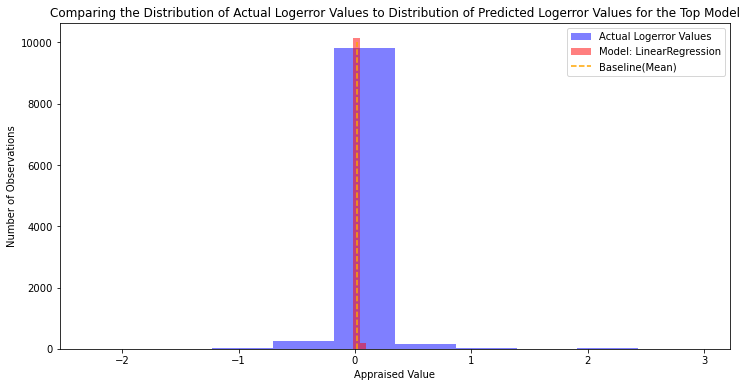

In [102]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(12,6))
plt.hist(y_test.actual, color='blue', alpha=.5, label="Actual Logerror Values")
plt.vlines(y_train.actual.mean(), 0, 10000, ls='--', color='orange', label='Baseline(Mean)')
# plt.hist(y_validate.model1, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_test.model4, color='red', alpha=.5, label='Model: LinearRegression')
# plt.hist(y_validate.model3, color='green', alpha=.5, label="Model: TweedieRegressor(GLM)")
plt.xlabel("Appraised Value")
plt.ylabel("Number of Observations")
plt.title("Comparing the Distribution of Actual Logerror Values to Distribution of Predicted Logerror Values for the Top Model")
plt.legend()
# plt.savefig('chart.png', facecolor='white')
plt.show()